### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)
# print(X.shape)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

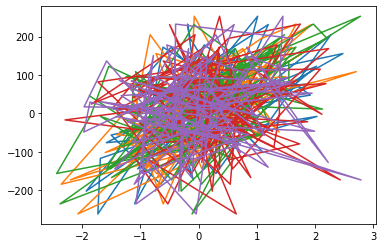

In [16]:
import matplotlib.pyplot as plt

# shown the plot for all 100 rows with 5 features each 

plt.plot(X[:],y)  
plt.show()

# however if we represent n_samples as 1 and n_features as 5 and then plot the data , we will det the graph 
# of 5 feaures independently with y 


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [3]:
import numpy as np
#  built a class of LinearRegression with its self defining constructor

class LinearRegression:
    # As soon as the obect is creacted this constructor function calles itself, 
    #  for initializing the parameters.
    def __init__(self, learning_rate=0.001, n_iters=1000):
      self.learning_rate=learning_rate
      self.n_iters=n_iters
      self.weights = None
      self.bias = None
       

  #  fit function uses optimization technique called gradient descent approach to recompute the weights and bias
  #  for n iterations.  
    def fit(self, X, y):
      n_samples, n_features = X.shape                                # n_samples = 100 , n_features = 5
      self.weights = np.zeros(n_features)                            # create a 0 matrix with dimention (5,)
      
      self.bias = 0                                                  # assigned bias to be zero for this case
   
      for i in range(self.n_iters):                                  # iterating for 1000 times for computing derivative and updating paameters
        y_predict = self.predict( X )
        del_weight= - (2 / n_samples) * np.dot( X.T , y - y_predict ) # will give 1 D array of 5 columns
        del_bias = - (2 / n_samples ) * np.sum( y - y_predict )       # will give a single value
       
        self.weights = self.weights - self.learning_rate * del_weight
        self.bias = self.bias - self.learning_rate * del_bias

      
    def predict(self, X):                                             # for returning y_predicted value
      return np.dot(X , self.weights ) + self.bias
        



### Initializing, Training & Predictions

In [17]:
regressor = LinearRegression()      # created an object "regressor" of class LinearRegression
regressor.fit(X_train, y_train)     # object "regressor" is envoking function fit for X_train, y_train datasets

predictions = regressor.predict(X_test)  # the predicted values of X_test is been stored in variable predictions

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [18]:
def mean_squared_error(y_true, y_pred):           # mean square error is used to evaluate your model correctness.
  return np.mean((y_true - y_pred)**2)


def r2_score(y_true, y_pred):                   # R2_score is also used to evaluate the model correctness. 
                                                # it uses correlation matrix as a mean to find its correlation 
  corr_matrix = np.corrcoef(y_true, y_pred)
  corr = corr_matrix[1,0]
                                                # print(corr_matrix.shape) will give (2,2) matrix
  R_sq = corr**2
  return R_sq  
          

mse = mean_squared_error(y_test, predictions) 
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("Accuracy:", accu)

MSE: 659.4416574156697
Accuracy: 0.9695609670736954


**Comparing the r2_score and MSE with built in sklearn functions**

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

                                         
print("r2_score from sklearn - ", r2_score(y_test, predictions))
print("MSE from sklearn - ", mean_squared_error(y_test, predictions))


r2_score from sklearn -  0.9376571817229341
MSE from sklearn -  659.4416574156697
